# Zindi Covid-19 Contest - Data Prep

This notebook shows how the data for the Zindi contest - Predicting the Global Spread of COVID-19 is derived. As this is an evolving situation, the dataset is not fixed at the start of the contest. Instead, you may use all available data at a given time, and are encouraged to keep incorporating new data as it becomes available. Each week, the leaderboard wil reset and a new submission file will be shared covering the most recent test period. The ultimate goal is to make predictions fo the time following the CLOSE of the competition - more info on the competition page.

In this notebook, we download the latest figures from https://github.com/CSSEGISandData/COVID-19, add some additional information, group by Country/Region, re-shape into the format required for submission and show how you can score your model on the latest data without needing to upload submissions to Zindi. 

## Downloading the Data

The data has been curated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE), and is pubically available on their GitHub repository. We clone the repository to get the data.


In [48]:
# Get the latest data
!git clone https://github.com/CSSEGISandData/COVID-19

fatal: destination path 'COVID-19' already exists and is not an empty directory.


## Loading the Data

In [49]:
import pandas as pd

In [50]:
cases = pd.read_csv('COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv', header=0)
cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,82,114,147,177,212,272,322,411,599,599.0
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,773,839,825,878,889,924,963,1007,1086,1086.0
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,212,226,243,266,313,345,385,432,455,455.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,2,2.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,238,428,566,673,790,900,1030,1183,1306,1306.0


In [51]:
deaths = pd.read_csv('COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,22,22,27,29,29,29,33,35,40,40.0
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,2,2,2,3,4,10,10.0


In [52]:
recover = pd.read_csv('time_series_covid19_recovered_global.csv')
recover

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,5,10,10,10,15,18,18,29,32,32
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,67,76,89,99,104,116,131,154,165,182
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,61,61,62,90,90,90,113,237,347,405
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,10,10,16,21,26,31,39,52,58,71
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1,1,1,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
248,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Adding All Countries 

To avoid changing the submission format, Zindi are now using a set list of countries. This section will be updated as new Countries/Regions are added to the JHU data, to try and maintain a consistent mapping.

In [53]:
# Download a list of countries from the UN
!curl -o EF.xlsx https://untermportal.un.org/unterm/country/downloadfile?targetLanguage=fr

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 11200  100 11200    0     0  15135      0 --:--:-- --:--:-- --:--:-- 15135


In [54]:
countries = pd.read_excel('EF.xlsx')[:193]
countries.head(2)

,English short,French short,English formal,French formal
0,Afghanistan,Afghanistan (l'),the Islamic Republic of Afghanistan,la République islamique d'Afghanistan
1,Albania,Albanie (l'),the Republic of Albania,la République d'Albanie


In [55]:
# Which regions in the JHU data have direct matches in countries?
print(deaths.shape, deaths['Country/Region'].unique().shape)
print(deaths.loc[deaths['Country/Region'].isin(countries['English short'].values)]['Country/Region'].unique().shape)

(501, 66) (183,)
(140,)


In [56]:
# For those with direct matches, add a new column ['Territory']
deaths['Territory'] = ''
for c in deaths.loc[deaths['Country/Region'].isin(countries['English short'].values)]['Country/Region'].unique():
    deaths.loc[deaths['Country/Region'] == c, 'Territory'] = c

# Same for cases
cases['Territory'] = ''
for c in cases.loc[cases['Country/Region'].isin(countries['English short'].values)]['Country/Region'].unique():
    cases.loc[cases['Country/Region'] == c, 'Territory'] = c

# Same for recover
recover['Territory'] = ''
for c in recover.loc[recover['Country/Region'].isin(countries['English short'].values)]['Country/Region'].unique():
    recover.loc[recover['Country/Region'] == c, 'Territory'] = c

deaths.loc[deaths['Country/Region']=='Taiwan*', 'Territory'] = 'Taiwan'
cases.loc[cases['Country/Region']=='Taiwan*', 'Territory'] = 'Taiwan'
recover.loc[recover['Country/Region']=='Taiwan*', 'Territory'] = 'Taiwan'

In [57]:
# The problem ones we need to reconcile manually:
print(deaths.loc[~deaths['Country/Region'].isin(countries['English short'].values)]['Country/Region'].unique())

['United Arab Emirates' 'Philippines' 'Dominican Republic' 'Martinique'
 'Brunei' 'US' 'Holy See' 'Iran' 'Korea, South' 'Cruise Ship' 'Taiwan*'
 'Vietnam' 'Russia' 'Moldova' 'Bolivia' 'United Kingdom'
 'Congo (Kinshasa)' "Cote d'Ivoire" 'Sudan' 'Venezuela' 'Kosovo'
 'Central African Republic' 'Congo (Brazzaville)' 'Netherlands' 'Tanzania'
 'Gambia, The' 'Bahamas, The' 'Niger' 'Cape Verde' 'East Timor' 'Syria'
 'Guadeloupe' 'Reunion' 'French Guiana' 'Mayotte' 'Greenland' 'Guam'
 'Guernsey' 'Jersey' 'Puerto Rico' 'Republic of the Congo' 'The Bahamas'
 'The Gambia']


In [58]:
# Add them manually:
deaths.loc[deaths['Country/Region'] == 'United Arab Emirates', 'Territory'] = 'United Arab Emirates (the)'
deaths.loc[deaths['Country/Region'] == 'Philippines', 'Territory'] = 'Philippines (the)'
deaths.loc[deaths['Country/Region'] == 'Dominican Republic', 'Territory'] = 'Dominican Republic (the)'
deaths.loc[deaths['Country/Region'] == 'Brunei', 'Territory'] = 'Brunei Darussalam'
deaths.loc[deaths['Country/Region'] == 'US', 'Territory'] = 'United States of America (the)'
deaths.loc[deaths['Country/Region'] == 'Iran', 'Territory'] = 'Iran (Islamic Republic of)'
deaths.loc[deaths['Country/Region'] == 'Korea, South', 'Territory'] = "Democratic People's Republic of Korea (the)" # IS this right?
deaths.loc[deaths['Country/Region'] == 'Vietnam', 'Territory'] = 'Viet Nam'
deaths.loc[deaths['Country/Region'] == 'Russia', 'Territory'] = 'Russian Federation (the)'
deaths.loc[deaths['Country/Region'] == 'Moldova', 'Territory'] = 'Republic of Moldova (the)'
deaths.loc[deaths['Country/Region'] == 'Bolivia', 'Territory'] = 'Bolivia (Plurinational State of)'
deaths.loc[deaths['Country/Region'] == 'United Kingdom', 'Territory'] = 'United Kingdom of Great Britain and Northern Ireland (the)'
deaths.loc[deaths['Country/Region'] == 'Congo (Kinshasa)', 'Territory'] = 'Democratic Republic of the Congo (the)' # <<< Please check
deaths.loc[deaths['Country/Region'] == "Cote d'Ivoire", 'Territory'] = "Côte d'Ivoire"
deaths.loc[deaths['Country/Region'] == 'Sudan', 'Territory'] = "South Sudan" #?
deaths.loc[deaths['Country/Region'] == 'Venezuela', 'Territory'] = "Venezuela (Bolivarian Republic of)"
deaths.loc[deaths['Country/Region'] == 'Central African Republic', 'Territory'] = 'Central African Republic (the)'
deaths.loc[deaths['Country/Region'] == 'Congo (Brazzaville)', 'Territory'] = 'Congo (the)'
deaths.loc[deaths['Country/Region'] == 'Netherlands', 'Territory'] = 'Netherlands (the)'
deaths.loc[deaths['Country/Region'] == 'Tanzania', 'Territory'] = 'United Republic of Tanzania (the)'
deaths.loc[deaths['Country/Region'] == 'Gambia, The', 'Territory'] = 'Gambia (the)'
deaths.loc[deaths['Country/Region'] == 'Bahamas, The', 'Territory'] = 'Bahamas (the)'

# Drop those without a country match (!! - check output to make sure we aren't missing new additions)
print('Dropping', deaths.loc[deaths['Territory'] == '']['Country/Region'].unique())
print(deaths.shape)
deaths=deaths.loc[deaths['Territory']!= '']
print(deaths.shape)

# And for cases
# Add them manually:
cases.loc[cases['Country/Region'] == 'United Arab Emirates', 'Territory'] = 'United Arab Emirates (the)'
cases.loc[cases['Country/Region'] == 'Philippines', 'Territory'] = 'Philippines (the)'
cases.loc[cases['Country/Region'] == 'Dominican Republic', 'Territory'] = 'Dominican Republic (the)'
cases.loc[cases['Country/Region'] == 'Brunei', 'Territory'] = 'Brunei Darussalam'
cases.loc[cases['Country/Region'] == 'US', 'Territory'] = 'United States of America (the)'
cases.loc[cases['Country/Region'] == 'Iran', 'Territory'] = 'Iran (Islamic Republic of)'
cases.loc[cases['Country/Region'] == 'Korea, South', 'Territory'] = "Democratic People's Republic of Korea (the)" # IS this right?
cases.loc[cases['Country/Region'] == 'Vietnam', 'Territory'] = 'Viet Nam'
cases.loc[cases['Country/Region'] == 'Russia', 'Territory'] = 'Russian Federation (the)'
cases.loc[cases['Country/Region'] == 'Moldova', 'Territory'] = 'Republic of Moldova (the)'
cases.loc[cases['Country/Region'] == 'Bolivia', 'Territory'] = 'Bolivia (Plurinational State of)'
cases.loc[cases['Country/Region'] == 'United Kingdom', 'Territory'] = 'United Kingdom of Great Britain and Northern Ireland (the)'
cases.loc[cases['Country/Region'] == 'Congo (Kinshasa)', 'Territory'] = 'Democratic Republic of the Congo (the)' # <<< Please check
cases.loc[cases['Country/Region'] == "Cote d'Ivoire", 'Territory'] = "Côte d'Ivoire"
cases.loc[cases['Country/Region'] == 'Sudan', 'Territory'] = "South Sudan" #?
cases.loc[cases['Country/Region'] == 'Venezuela', 'Territory'] = "Venezuela (Bolivarian Republic of)"
cases.loc[cases['Country/Region'] == 'Central African Republic', 'Territory'] = 'Central African Republic (the)'
cases.loc[cases['Country/Region'] == 'Congo (Brazzaville)', 'Territory'] = 'Congo (the)'
cases.loc[cases['Country/Region'] == 'Netherlands', 'Territory'] = 'Netherlands (the)'
cases.loc[cases['Country/Region'] == 'Tanzania', 'Territory'] = 'United Republic of Tanzania (the)'
cases.loc[cases['Country/Region'] == 'Gambia, The', 'Territory'] = 'Gambia (the)'
cases.loc[cases['Country/Region'] == 'Bahamas, The', 'Territory'] = 'Bahamas (the)'


# Drop those without a country match (!! - check output to make sure we aren't missing new additions)
print('Dropping', cases.loc[cases['Territory'] == '']['Country/Region'].unique())
print(cases.shape)
cases=cases.loc[cases['Territory']!= '']
print(cases.shape)

# And for recover
# Add them manually:
recover.loc[recover['Country/Region'] == 'United Arab Emirates', 'Territory'] = 'United Arab Emirates (the)'
recover.loc[recover['Country/Region'] == 'Philippines', 'Territory'] = 'Philippines (the)'
recover.loc[recover['Country/Region'] == 'Dominican Republic', 'Territory'] = 'Dominican Republic (the)'
recover.loc[recover['Country/Region'] == 'Brunei', 'Territory'] = 'Brunei Darussalam'
recover.loc[recover['Country/Region'] == 'US', 'Territory'] = 'United States of America (the)'
recover.loc[recover['Country/Region'] == 'Iran', 'Territory'] = 'Iran (Islamic Republic of)'
recover.loc[recover['Country/Region'] == 'Korea, South', 'Territory'] = "Democratic People's Republic of Korea (the)" # IS this right?
recover.loc[recover['Country/Region'] == 'Vietnam', 'Territory'] = 'Viet Nam'
recover.loc[recover['Country/Region'] == 'Russia', 'Territory'] = 'Russian Federation (the)'
recover.loc[recover['Country/Region'] == 'Moldova', 'Territory'] = 'Republic of Moldova (the)'
recover.loc[recover['Country/Region'] == 'Bolivia', 'Territory'] = 'Bolivia (Plurinational State of)'
recover.loc[recover['Country/Region'] == 'United Kingdom', 'Territory'] = 'United Kingdom of Great Britain and Northern Ireland (the)'
recover.loc[recover['Country/Region'] == 'Congo (Kinshasa)', 'Territory'] = 'Democratic Republic of the Congo (the)' # <<< Please check
recover.loc[recover['Country/Region'] == "Cote d'Ivoire", 'Territory'] = "Côte d'Ivoire"
recover.loc[recover['Country/Region'] == 'Sudan', 'Territory'] = "South Sudan" #?
recover.loc[recover['Country/Region'] == 'Venezuela', 'Territory'] = "Venezuela (Bolivarian Republic of)"
recover.loc[recover['Country/Region'] == 'Central African Republic', 'Territory'] = 'Central African Republic (the)'
recover.loc[recover['Country/Region'] == 'Congo (Brazzaville)', 'Territory'] = 'Congo (the)'
recover.loc[recover['Country/Region'] == 'Netherlands', 'Territory'] = 'Netherlands (the)'
recover.loc[recover['Country/Region'] == 'Tanzania', 'Territory'] = 'United Republic of Tanzania (the)'
recover.loc[recover['Country/Region'] == 'Gambia, The', 'Territory'] = 'Gambia (the)'
recover.loc[recover['Country/Region'] == 'Bahamas, The', 'Territory'] = 'Bahamas (the)'


# Drop those without a country match (!! - check output to make sure we aren't missing new additions)
print('Dropping', recover.loc[recover['Territory'] == '']['Country/Region'].unique())
print(recover.shape)
recover=recover.loc[recover['Territory']!= '']
print(recover.shape)

Dropping ['Martinique' 'Holy See' 'Cruise Ship' 'Kosovo' 'Niger' 'Cape Verde'
 'East Timor' 'Syria' 'Guadeloupe' 'Reunion' 'French Guiana' 'Mayotte'
 'Greenland' 'Guam' 'Guernsey' 'Jersey' 'Puerto Rico'
 'Republic of the Congo' 'The Bahamas' 'The Gambia']
(501, 67)
(481, 67)
Dropping ['Martinique' 'Holy See' 'Cruise Ship' 'Kosovo' 'Niger' 'Cape Verde'
 'East Timor' 'Syria' 'Guadeloupe' 'Reunion' 'French Guiana' 'Mayotte'
 'Greenland' 'Guam' 'Guernsey' 'Jersey' 'Puerto Rico'
 'Republic of the Congo' 'The Bahamas' 'The Gambia']
(501, 67)
(481, 67)
Dropping ['Bahamas' 'Diamond Princess' 'Gambia' 'Holy See' 'Niger' 'Syria'
 'West Bank and Gaza' 'Laos' 'Kosovo' 'Burma' 'MS Zaandam'
 'Western Sahara']
(250, 85)
(238, 85)


In [59]:
# Add the rest of the countries with cases set to 0 (!! Use with caution as data may be unreported)
import numpy as np

remainder = countries.loc[~countries['English short'].isin(deaths.Territory.unique())]
print('Adding:', remainder['English short'].unique())
for c in remainder['English short'].unique():
  row = pd.Series([0 for _ in range(len(deaths.columns))])
  row_df = pd.DataFrame([row])
  row_df.columns = deaths.columns
  row_df['Country/Region'] = c
  row_df['Territory'] = c
  deaths = pd.concat([deaths, row_df], ignore_index=True)
print(deaths.shape)

# And for cases
for c in remainder['English short'].unique():
  row = pd.Series([0 for _ in range(len(cases.columns))])
  row_df = pd.DataFrame([row])
  row_df.columns = cases.columns
  row_df['Country/Region'] = c
  row_df['Territory'] = c
  cases = pd.concat([cases, row_df], ignore_index=True)
print(cases.shape)

# And for recover
for c in remainder['English short'].unique():
  row = pd.Series([0 for _ in range(len(recover.columns))])
  row_df = pd.DataFrame([row])
  row_df.columns = recover.columns
  row_df['Country/Region'] = c
  row_df['Territory'] = c
  recover = pd.concat([recover, row_df], ignore_index=True)
print(recover.shape)

Adding: ['Belize' 'Botswana' 'Burundi' 'Comoros (the)' 'Guinea-Bissau' 'Kiribati'
 "Lao People's Democratic Republic (the)" 'Lesotho' 'Libya' 'Malawi'
 'Mali' 'Marshall Islands (the)' 'Micronesia (Federated States of)'
 'Myanmar' 'Nauru' 'Niger (the)' 'Palau' 'Republic of Korea (the)'
 'Saint Kitts and Nevis' 'Samoa' 'Sao Tome and Principe' 'Sierra Leone'
 'Solomon Islands' 'Sudan (the)' 'Syrian Arab Republic (the)' 'Tajikistan'
 'Tonga' 'Turkmenistan' 'Tuvalu' 'Vanuatu' 'Yemen']
(512, 67)
(512, 67)
(269, 85)


# Splitting out some regions into their own territories

Some regions are listed as part of one country, but due to geography or politics can be considered a separate entity. Wothout getting too political, let's separate out a few of these.

In [60]:
# Taiwan, St. Martin, Faroe Islands, St. Barthelemy, French Polynesia, French Guiana, Mayotte, Guadeloupe, Curacao, Cayman Islands, Reunion, Aruba, monserrat, Greenland, new caledonia, Bermuda.
for r in ['St Martin', 'Faroe Islands', 'Saint Barthelemy', 'French Polynesia', 'French Guiana', 'Mayotte',
          'Guadeloupe', 'Curacao', 'Cayman Islands', 'Reunion', 'Aruba', 'Montserrat', 'Greenland', 'New Caledonia', 'Bermuda']:
      if deaths.loc[deaths['Province/State']==r].shape[0]<1:
        print(r)
        deaths.loc[deaths['Province/State']==r, 'Territory'] = r
        cases.loc[cases['Province/State']==r, 'Territory'] = r
        recover.loc[recover['Province/State']==r, 'Territory'] = r


## Adding Population info

This is optional, but this section adds population info. Use with caution, and feel free to make manual corrections. 

In [61]:
!pip install countryinfo # Run if needed

ERROR: Invalid requirement: '#'


In [62]:
from countryinfo import CountryInfo

pops = {}
fails = []

regions = sorted(deaths['Territory'].unique())
for r in regions:
  try:
    country = CountryInfo(r)
    pops[r] = country.info()['population']
  except:
    fails.append(r)
    print('No pop data for', r)

No pop data for Afghanistan
No pop data for Albania
No pop data for Algeria
No pop data for Andorra
No pop data for Angola
No pop data for Antigua and Barbuda
No pop data for Argentina
No pop data for Armenia
No pop data for Australia
No pop data for Austria
No pop data for Azerbaijan
No pop data for Bahamas (the)
No pop data for Bahrain
No pop data for Bangladesh
No pop data for Barbados
No pop data for Belarus
No pop data for Belgium
No pop data for Belize
No pop data for Benin
No pop data for Bhutan
No pop data for Bolivia (Plurinational State of)
No pop data for Bosnia and Herzegovina
No pop data for Botswana
No pop data for Brazil
No pop data for Brunei Darussalam
No pop data for Bulgaria
No pop data for Burkina Faso
No pop data for Burundi
No pop data for Cabo Verde
No pop data for Cambodia
No pop data for Cameroon
No pop data for Canada
No pop data for Central African Republic (the)
No pop data for Chad
No pop data for Chile
No pop data for China
No pop data for Colombia
No pop 

In [63]:
# Manual fixes
# As you can see, this missed many territories, but is provided as a starting point. You can manually add or source better datasets.

In [64]:
# Adding in population as a column
cols = list(deaths.columns)
deaths['Population'] = deaths['Country/Region'].map(pops)
deaths = deaths[cols[:2]+['Territory','Population']+cols[2:-1]] # Better ordering
deaths

,Province/State,Country/Region,Territory,Population,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,Thailand,NaN,15.0000,101.0000,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0
1,NaN,Japan,Japan,NaN,36.0000,138.0000,0,0,0,0,...,22,22,27,29,29,29,33,35,40,40.0
2,NaN,Singapore,Singapore,NaN,1.2833,103.8333,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2.0
3,NaN,Nepal,Nepal,NaN,28.1667,84.2500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,NaN,Malaysia,Malaysia,NaN,2.5000,112.5000,0,0,0,0,...,0,0,0,2,2,2,3,4,10,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,0,Tonga,Tonga,NaN,0.0000,0.0000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
508,0,Turkmenistan,Turkmenistan,NaN,0.0000,0.0000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
509,0,Tuvalu,Tuvalu,NaN,0.0000,0.0000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
510,0,Vanuatu,Vanuatu,NaN,0.0000,0.0000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


# Replace missing Lat and Long

In [65]:
# terri = pd.read_csv('Territor.csv', header=0, encoding='latin-1')
# terri = terri.drop_duplicates(keep='first', subset=['Territory'])
# deaths = deaths.merge(terri, how = 'left', sort=False)
# cases = cases.merge(terri, how = 'left', sort=False)
# recover = recover.merge(terri, how = 'left', sort=False)
# deaths.loc[deaths['WDI_Code'].isna(),'WDI_Code'] = 'CHN'
# cases.loc[cases['WDI_Code'].isna(),'WDI_Code'] = 'CHN'
# recover.loc[recover['WDI_Code'].isna(),'WDI_Code'] = 'CHN'
# # deaths.loc[deaths['3/23/20'].isna(),'3/23/20'] = deaths.loc[deaths['3/23/20'].isna(),'3/22/20']
# # cases.loc[cases['3/23/20'].isna(),'3/23/20'] = cases.loc[cases['3/23/20'].isna(),'3/22/20']
# deaths = deaths.drop('Population', axis = 1)
# deaths

In [66]:
# deaths.to_csv('deaths.csv', index = False)
# recover.to_csv('recover.csv', index = False)

In [67]:
recover

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,Territory
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,10,10,10,15,18,18,29,32,32,Afghanistan
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,76,89,99,104,116,131,154,165,182,Albania
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,61,62,90,90,90,113,237,347,405,Algeria
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,10,16,21,26,31,39,52,58,71,Andorra
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,1,1,2,2,2,2,2,2,2,Angola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,0,Tonga,0.0000,0.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Tonga
265,0,Turkmenistan,0.0000,0.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Turkmenistan
266,0,Tuvalu,0.0000,0.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Tuvalu
267,0,Vanuatu,0.0000,0.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Vanuatu


In [68]:
# deaths.isna().sum()[deaths.isna().sum()>0], cases.isna().sum()[cases.isna().sum()>0], recover.isna().sum()[recover.isna().sum()>0]
# deaths.shape, cases.shape, recover.shape

In [69]:
# # Replace missing Lat and Long
# lat = pd.read_csv('Lat.csv', header=0)
# for i in range(lat.shape[0]):
#     deaths.loc[deaths['Territory']==lat.loc[i,'Territory'],['Lat', 'Long']] = lat.loc[i,['Lat', 'Long']].tolist()
#     cases.loc[cases['Territory']==lat.loc[i,'Territory'],['Lat', 'Long']] = lat.loc[i,['Lat', 'Long']].tolist()
#     recover.loc[recover['Territory']==lat.loc[i,'Territory'],['Lat', 'Long']] = lat.loc[i,['Lat', 'Long']].tolist()


# final_dt = pd.read_csv('final_dt.csv', header=0, encoding='latin-1').iloc[:,1:]
# dd = dd.merge(final_dt, how = 'left', sort=False, left_on='WDI_Code', right_on='Country.Code')


# dd[dd['Territory']=='China']
# dd = 
# # GDP (done)
# gdp = pd.read_csv('gdp_gdpPerCapita.csv', header=0)
# deaths['GDP'] = np.nan
# for i in range(gdp.shape[0]):
#     deaths.loc[deaths['Country/Region']==gdp.loc[i,'Country'],
#                ['Population', 'GDP']] = gdp.loc[i,['pop', 'gdpPerCapita']].tolist()
# # deaths[deaths['GDP'].isna()]

# # Populaton Density (done)
# pop_den = pd.read_csv('population_density_area.csv', header=0)
# deaths['Prop_density'] = np.nan
# for i in range(gdp.shape[0]):
#     deaths.loc[deaths['Country/Region']==pop_den.loc[i,'country'],
#                ['Prop_density']] = pop_den.loc[i,['Density_mi']]
    
# pd.DataFrame(deaths.loc[~(deaths['Country/Region'].isin(pop_den['Country'])),
#                         'Country/Region'].unique()).to_csv('aa.csv')
# deaths.loc[~(deaths['Prop_density'].isna()),
#                         'Country/Region'].unique()

# Healthcare Spending
# helth_spn = pd.read_csv('healthcare_spending.csv', header=0)


# pd.DataFrame(deaths.loc[~(deaths['Country/Region'].isin(helth_spn['Countries'])),
#                         'Country/Region'].unique()).to_csv('aa.csv')

# deaths.loc[~(deaths['Country/Region'].isin(helth_spn['Countries'])),
#            'Country/Region'].unique()

# Health infrastructure
# helth_inf = pd.read_csv('Health_infrastructure.csv', header=0)


# pd.DataFrame(deaths.loc[~(deaths['Country/Region'].isin(helth_inf['Country'])),
#                         'Country/Region'].unique()).to_csv('aa.csv')

# deaths.loc[~(deaths['Country/Region'].isin(helth_inf['Country'])),
#            'Country/Region'].unique()


In [70]:
# pd.DataFrame(deaths['Country/Region'].unique()).to_csv('Country.csv')

In [88]:
len(deaths['Territory'].unique())
deaths

,Province/State,Country/Region,Territory,Population,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,Thailand,NaN,15.0000,101.0000,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0
1,NaN,Japan,Japan,NaN,36.0000,138.0000,0,0,0,0,...,22,22,27,29,29,29,33,35,40,40.0
2,NaN,Singapore,Singapore,NaN,1.2833,103.8333,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2.0
3,NaN,Nepal,Nepal,NaN,28.1667,84.2500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,NaN,Malaysia,Malaysia,NaN,2.5000,112.5000,0,0,0,0,...,0,0,0,2,2,2,3,4,10,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,0,Tonga,Tonga,NaN,0.0000,0.0000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
508,0,Turkmenistan,Turkmenistan,NaN,0.0000,0.0000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
509,0,Tuvalu,Tuvalu,NaN,0.0000,0.0000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
510,0,Vanuatu,Vanuatu,NaN,0.0000,0.0000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [92]:
dt1 = deaths.melt(id_vars= ['Province/State', 'Country/Region', 'Territory', 'Population', 'Lat', 'Long'],
                    var_name='Date', value_name='Cum_deaths').reset_index()
dt1['Date'] = pd.to_datetime(dt1['Date'], format = "%m/%d/%y") #.dt.strftime('%m/%d/%y')
dt1['Province/State'] = dt1['Province/State'].fillna('None')

dt2 = cases.melt(id_vars= ['Province/State', 'Country/Region', 'Territory',  'Lat', 'Long'],
                    var_name='Date', value_name='Cases')
dt2['Date'] = pd.to_datetime(dt2['Date'], format = "%m/%d/%y") #.dt.strftime('%m/%d/%y')
dt2['Province/State'] = dt2['Province/State'].fillna('None')
#     dt2['Date'] = pd.to_datetime(dt2['Date'])

dt = dt1.merge(dt2, on = ['Province/State', 'Country/Region', 'Territory',  'Lat', 'Long', 'Date'])
# del dt1, dt2

dt['Province/State'] = dt['Province/State'].fillna('None')

dt = dt.sort_values(by=['Province/State', 'Country/Region', 'Territory',  'Lat', 'Long', 'Date'])

dt['Daily_deaths'] = dt.groupby(['Province/State', 'Country/Region', 'Territory', 'Lat', 
                                     'Long'])['Cum_deaths'].diff()
dt.loc[dt['Daily_deaths'].isna(),'Daily_deaths'] = dt[dt['Daily_deaths'].isna()]['Cum_deaths']
dt['Daily_cases'] = dt.groupby(['Province/State', 'Country/Region', 'Territory', 'Lat', 
                                'Long'])['Cases'].diff()
dt.loc[dt['Daily_cases'].isna(),'Daily_cases'] = dt[dt['Daily_cases'].isna()]['Cases']
dt

,index,Province/State,Country/Region,Territory,Population,Lat,Long,Date,Cum_deaths,Cases,Daily_deaths,Daily_cases
481,481,0,Belize,Belize,NaN,0.0000,0.0000,2020-01-22,0.0,0.0,0.0,0.0
993,993,0,Belize,Belize,NaN,0.0000,0.0000,2020-01-23,0.0,0.0,0.0,0.0
1505,1505,0,Belize,Belize,NaN,0.0000,0.0000,2020-01-24,0.0,0.0,0.0,0.0
2017,2017,0,Belize,Belize,NaN,0.0000,0.0000,2020-01-25,0.0,0.0,0.0,0.0
2529,2529,0,Belize,Belize,NaN,0.0000,0.0000,2020-01-26,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
29342,29342,Zhejiang,China,China,NaN,29.1832,120.0934,2020-03-19,1.0,1233.0,0.0,1.0
29854,29854,Zhejiang,China,China,NaN,29.1832,120.0934,2020-03-20,1.0,1234.0,0.0,1.0
30366,30366,Zhejiang,China,China,NaN,29.1832,120.0934,2020-03-21,1.0,1236.0,0.0,2.0
30878,30878,Zhejiang,China,China,NaN,29.1832,120.0934,2020-03-22,1.0,1237.0,0.0,1.0


In [93]:
bb = dt.loc[dt['Territory'].isin(dt['Territory'][~(dt['Territory'].isin(deaths['Territory'].unique()))].unique()),]
dt['Date'].max()

Timestamp('2020-03-23 00:00:00')

In [94]:
from datetime import datetime

def data_prep():
    dt1 = deaths.melt(id_vars= ['Province/State', 'Country/Region', 'Territory', 'Population', 'Lat', 'Long'],
                    var_name='Date', value_name='Cum_deaths').reset_index()
    dt1['Date'] = pd.to_datetime(dt1['Date'], format = "%m/%d/%y") #.dt.strftime('%m/%d/%y')
#     dt1['Date'] = pd.to_datetime(dt1['Date'])

    dt2 = cases.melt(id_vars= ['Province/State', 'Country/Region', 'Territory', 'Lat', 'Long'],
                    var_name='Date', value_name='Cases')
    dt2['Date'] = pd.to_datetime(dt2['Date'], format = "%m/%d/%y") #.dt.strftime('%m/%d/%y')
#     dt2['Date'] = pd.to_datetime(dt2['Date'])

    dt = dt1.merge(dt2, on = ['Province/State', 'Country/Region', 'Territory', 'Lat', 'Long', 'Date'])
    del dt1, dt2
    dt['Population'] = dt['Population'].fillna(0)
    dt['Province/State'] = dt['Province/State'].fillna('None')

    dt = dt.sort_values(by=['Province/State', 'Country/Region', 'Territory', 'Lat', 'Long', 'Date'])

    dt['Cases'] = dt.groupby(['Province/State', 'Country/Region', 'Territory', 'Lat', 
                              'Long'])['Cases'].fillna(method = 'ffill')
    dt['Cases'] = dt['Cases'].fillna(0)
    dt['Cum_deaths'] = dt.groupby(['Province/State', 'Country/Region', 'Territory', 'Lat', 
                                   'Long'])['Cum_deaths'].fillna(method = 'ffill')
    dt['Cum_deaths'] = dt['Cum_deaths'].fillna(0)
    dt['Daily_deaths'] = dt.groupby(['Province/State', 'Country/Region', 'Territory', 'Lat', 
                                     'Long'])['Cum_deaths'].diff()
    dt.loc[dt['Daily_deaths'].isna(),'Daily_deaths'] = dt[dt['Daily_deaths'].isna()]['Cum_deaths']
    dt['Daily_cases'] = dt.groupby(['Province/State', 'Country/Region', 'Territory', 'Lat', 
                                    'Long'])['Cases'].diff()
    dt.loc[dt['Daily_cases'].isna(),'Daily_cases'] = dt[dt['Daily_cases'].isna()]['Cases']
    dt['Day'] = pd.DatetimeIndex(dt['Date']).day
    dt['Month'] = pd.DatetimeIndex(dt['Date']).month
    dt['Week'] = pd.DatetimeIndex(dt['Date']).week
    dt['Week_of_month'] = (dt['Day']-1)//7.0+1
    return (dt)

def lag_var(dt, target, lag_list, group_vars, name_prefix):
    for i in lag_list:
        dt[name_prefix+str(i)] = dt.groupby(group_vars)[target].shift(i).fillna(0)
    return(dt)




# Cluster Territory

def country_cluster(dt):
    from sklearn.model_selection import train_test_split
    from sklearn.cluster import KMeans
    from sklearn.preprocessing import StandardScaler

    dt1 = dt.groupby(['Province/State', 'Country/Region', 'Territory', 'Lat', 'Long']).sum().reset_index()

    std_scale=StandardScaler().fit_transform(dt1.drop(['Province/State', 'Country/Region', 'Territory', 
                                                       'Lat', 'Long'], axis=1))
    log_clf=KMeans(n_clusters = 15).fit(std_scale)
    dt1['Cluster_territory'] = log_clf.labels_
    dt = dt.merge(dt1[['Province/State', 'Country/Region', 'Territory', 'Lat', 'Long', 
                       'Cluster_territory']], 
                  on = ['Province/State', 'Country/Region', 'Territory', 'Lat', 'Long'])
    del dt1, std_scale, log_clf
    return(dt)


# pd.crosstab(log_clf.labels_, df1.iloc[:,6])
# pd.crosstab(index=log_clf.labels_, columns="count") 
# dd = pd.DataFrame({'a': df1.iloc[:,2], 'b':log_clf.labels_})
# dd1 = dd.groupby('b')

# for key, item in dd1:
#     print(dd1.get_group(key), "\n\n")



def cases_grow(dt, var_names, n_cases=0):
    df1 = dt[['Province/State', 'Country/Region', 'Territory', 'Lat', 'Long', 'Date', 
              'Cases']][dt['Cases']>n_cases]
    df22 = df1.groupby(['Province/State', 'Country/Region', 'Territory', 
                        'Lat', 'Long'])['Cases'].idxmin()
    df1 = df1.loc[df22][['Province/State', 'Country/Region', 'Territory', 
                         'Lat', 'Long', 'Date']].rename(columns={"Date": var_names[0]})
    dt = dt.merge(df1, how = 'left', sort=False)
    dt['Diff_'+var_names[0]] = (dt['Date'] - dt[var_names[0]]).dt.days.fillna(0)
    dt['Diff_'+var_names[0]].mask(dt['Diff_'+var_names[0]]<0, 0, inplace=True)
    del df1
    

    df4 = dt[['Country/Region', 'Territory', 'Date', 'Cases']][dt['Cases']>n_cases]
    df22 = df4.groupby(['Country/Region', 'Territory'])['Cases'].idxmin()
    df4 = df4.loc[df22][['Country/Region', 'Territory', 'Date']].rename(columns={"Date": var_names[1]})

    dt = dt.merge(df4, how = 'left', sort=False)
    dt['Diff_'+var_names[1]] = (dt['Date'] - dt[var_names[1]]).dt.days.fillna(0)
    dt['Diff_'+var_names[1]].mask(dt['Diff_'+var_names[1]]<0, 0, inplace=True)
    del df4

    dt = dt.drop(var_names, axis = 1)
    return(dt)

def death_grow(dt, var_names, n_deaths = 0):
    df2 = dt[['Province/State', 'Country/Region', 'Territory', 'Lat', 'Long', 'Date', 
          'Cum_deaths']][dt['Cum_deaths']>n_deaths]
    df22 = df2.groupby(['Province/State', 'Country/Region', 'Territory', 
                        'Lat', 'Long'])['Cum_deaths'].idxmin()
    df2 = df2.loc[df22][['Province/State', 'Country/Region', 'Territory', 
                         'Lat', 'Long', 'Date']].rename(columns={"Date": var_names[0]})
    dt = dt.merge(df2, how = 'left', sort=False)
    dt['Diff_'+var_names[0]] = (dt['Date'] - dt[var_names[0]]).dt.days.fillna(0)
    dt['Diff_'+var_names[0]].mask(dt['Diff_'+var_names[0]]<0, 0, inplace=True)
    del df2

    df3 = dt[['Country/Region', 'Territory', 'Date', 'Cum_deaths']][dt['Cum_deaths']>n_deaths]
    df22 = df3.groupby(['Country/Region', 'Territory'])['Cum_deaths'].idxmin()
    df3 = df3.loc[df22][['Country/Region', 'Territory', 'Date']].rename(columns={"Date": var_names[1]})
    dt = dt.merge(df3, how = 'left', sort=False)
    dt['Diff_'+var_names[1]] = (dt['Date'] - dt[var_names[1]]).dt.days.fillna(0)
    dt['Diff_'+var_names[1]].mask(dt['Diff_'+var_names[1]]<0, 0, inplace=True)
    del df3
    dt = dt.drop(var_names, axis = 1)
    return(dt)

aa = lambda x : (1 if (x > 0 and x <= 7) else 
                 (2 if (x > 7 and x <= 14) else 
                  (3 if (x > 14 and x <= 21) else 
                   (4 if (x > 21 and x <= 28) else 
                    (5 if (x > 28) else 0)))))

df = data_prep()

lag_until1 = 1

lag_var(dt = df, target = 'Daily_deaths', 
        lag_list = range(1,lag_until1), 
        group_vars = ['Province/State', 'Country/Region', 'Territory', 'Lat', 'Long'],
        name_prefix = 'lag_deaths')

lag_until2 = 1
lag_var(dt = df, target = 'Daily_cases', 
        lag_list = range(1,lag_until2), 
        group_vars = ['Province/State', 'Country/Region', 'Territory', 'Lat', 'Long'],
        name_prefix = 'lag_cases')


ncases = [0,10,30,50,100,200,400,600,1000,2000,5000]
for i in ncases:
    df = cases_grow(df, ['1st_cases'+str(i), '1st_cases_country'+str(i)], n_cases = i)


ndeaths = [0,10,30,50,100,150, 200,300]
for i in ndeaths:
    df = death_grow(df, ['1st_deaths'+str(i), '1st_deaths_country'+str(i)], n_deaths = i)


for i in ncases:
    df[str(i)+'days_cases'] = df['Diff_1st_cases'+str(i)].apply(aa)

for i in ndeaths:
    df[str(i)+'days_deaths'] = df['Diff_1st_deaths'+str(i)].apply(aa)
    
for i in ncases:
    df[str(i)+'days_cases_country'] = df['Diff_1st_cases_country'+str(i)].apply(aa)

for i in ndeaths:
    df[str(i)+'days_deaths_country'] = df['Diff_1st_deaths_country'+str(i)].apply(aa)
# df = country_cluster(df)
# df = df.set_index('index')
df

# df['Cum_sum'] = df.groupby(['Province/State', 'Country/Region', 'Territory'])['Daily_deaths'].cumsum()

,index,Province/State,Country/Region,Territory,Population,Lat,Long,Date,Cum_deaths,Cases,...,2000days_cases_country,5000days_cases_country,0days_deaths_country,10days_deaths_country,30days_deaths_country,50days_deaths_country,100days_deaths_country,150days_deaths_country,200days_deaths_country,300days_deaths_country
0,481,0,Belize,Belize,0.0,0.0000,0.0000,2020-01-22,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,993,0,Belize,Belize,0.0,0.0000,0.0000,2020-01-23,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1505,0,Belize,Belize,0.0,0.0000,0.0000,2020-01-24,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2017,0,Belize,Belize,0.0,0.0000,0.0000,2020-01-25,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2529,0,Belize,Belize,0.0,0.0000,0.0000,2020-01-26,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31739,29342,Zhejiang,China,China,0.0,29.1832,120.0934,2020-03-19,1.0,1233.0,...,5,5,5,5,5,5,5,5,5,5
31740,29854,Zhejiang,China,China,0.0,29.1832,120.0934,2020-03-20,1.0,1234.0,...,5,5,5,5,5,5,5,5,5,5
31741,30366,Zhejiang,China,China,0.0,29.1832,120.0934,2020-03-21,1.0,1236.0,...,5,5,5,5,5,5,5,5,5,5
31742,30878,Zhejiang,China,China,0.0,29.1832,120.0934,2020-03-22,1.0,1237.0,...,5,5,5,5,5,5,5,5,5,5


In [95]:
dt = df
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

dt1 = dt.groupby(['Territory']).sum().reset_index()

std_scale=StandardScaler().fit_transform(dt1.drop(['Territory', 
                                                   'Lat', 'Long'], axis=1))
log_clf=KMeans(n_clusters = 10).fit(std_scale)
dt1['Cluster_territory'] = log_clf.labels_
# dt = dt.merge(dt1[['Province/State', 'Country/Region', 'Territory', 'Lat', 'Long', 
#                    'Cluster_territory']], 
#               on = ['Province/State', 'Country/Region', 'Territory', 'Lat', 'Long'])

In [96]:
dt1

,Territory,index,Population,Lat,Long,Cum_deaths,Cases,Daily_deaths,Daily_cases,Day,...,5000days_cases_country,0days_deaths_country,10days_deaths_country,30days_deaths_country,50days_deaths_country,100days_deaths_country,150days_deaths_country,200days_deaths_country,300days_deaths_country,Cluster_territory
0,Afghanistan,969804,0.0,2046.0000,4030.0000,2.0,289.0,1.0,40.0,976,...,0,1,0,0,0,0,0,0,0,6
1,Albania,974020,0.0,2551.5046,1250.4346,19.0,713.0,2.0,89.0,976,...,0,17,0,0,0,0,0,0,0,6
2,Algeria,969990,0.0,1738.1018,102.8952,94.0,1192.0,17.0,201.0,976,...,0,15,3,0,0,0,0,0,0,6
3,Andorra,971912,0.0,2635.3906,94.3516,2.0,536.0,1.0,113.0,976,...,0,1,0,0,0,0,0,0,0,6
4,Angola,997084,0.0,-694.5674,1108.1818,0.0,7.0,0.0,2.0,976,...,0,0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Venezuela (Bolivarian Republic of),994108,0.0,398.2756,-4128.5614,0.0,392.0,0.0,70.0,976,...,0,0,0,0,0,0,0,0,0,6
190,Viet Nam,979848,0.0,992.0000,6696.0000,0.0,1552.0,0.0,113.0,976,...,0,0,0,0,0,0,0,0,0,0
191,Yemen,999874,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,976,...,0,0,0,0,0,0,0,0,0,6
192,Zambia,996216,0.0,-955.8354,1753.5646,0.0,14.0,0.0,3.0,976,...,0,0,0,0,0,0,0,0,0,6


In [97]:
dt22 = dt1[['Territory', 'Cluster_territory']]
dt22.drop_duplicates(subset = ['Territory', 'Cluster_territory']).to_csv('Cluster_territoy.csv')

In [98]:
df.iloc[:,7::].corr()

,Cum_deaths,Cases,Daily_deaths,Daily_cases,Day,Month,Week,Week_of_month,Diff_1st_cases0,Diff_1st_cases_country0,...,2000days_cases_country,5000days_cases_country,0days_deaths_country,10days_deaths_country,30days_deaths_country,50days_deaths_country,100days_deaths_country,150days_deaths_country,200days_deaths_country,300days_deaths_country
Cum_deaths,1.000000,0.940261,0.610403,0.429994,0.004505,0.039707,0.047572,0.004026,0.157840,0.160891,...,0.177195,0.170209,0.189766,0.201820,0.167842,0.175529,0.175640,0.172729,0.170117,0.167267
Cases,0.940261,1.000000,0.472425,0.428221,0.002408,0.045832,0.053699,0.001660,0.192648,0.195233,...,0.215181,0.206348,0.211309,0.217377,0.201214,0.209348,0.206563,0.203238,0.200820,0.197351
Daily_deaths,0.610403,0.472425,1.000000,0.757737,0.005449,0.035687,0.042262,0.003928,0.118100,0.112336,...,0.089001,0.070208,0.131208,0.126176,0.086274,0.088064,0.080355,0.071776,0.066395,0.059785
Daily_cases,0.429994,0.428221,0.757737,1.000000,0.000959,0.046329,0.051826,-0.002615,0.139624,0.130975,...,0.082448,0.057579,0.117116,0.095912,0.079037,0.075830,0.062950,0.052152,0.046714,0.040566
Day,0.004505,0.002408,0.005449,0.000959,1.000000,-0.517792,-0.126854,0.972648,-0.005692,0.003615,...,0.008825,-0.002080,0.008490,0.020011,0.027771,0.011798,-0.010371,-0.022321,-0.025921,-0.022948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50days_deaths_country,0.175529,0.209348,0.088064,0.075830,0.011798,0.164815,0.196111,0.006045,0.674897,0.753338,...,0.988388,0.977312,0.790424,0.867681,0.965793,1.000000,0.972924,0.963825,0.961514,0.957643
100days_deaths_country,0.175640,0.206563,0.080355,0.062950,-0.010371,0.125650,0.141496,-0.011723,0.667978,0.720440,...,0.978244,0.975278,0.797544,0.870319,0.920844,0.972924,1.000000,0.988979,0.986119,0.981068
150days_deaths_country,0.172729,0.203238,0.071776,0.052152,-0.022321,0.124238,0.132456,-0.023931,0.667348,0.713885,...,0.967484,0.975609,0.796526,0.875666,0.904819,0.963825,0.988979,1.000000,0.996594,0.990422
200days_deaths_country,0.170117,0.200820,0.066395,0.046714,-0.025921,0.128764,0.136207,-0.025850,0.668004,0.714660,...,0.964813,0.978899,0.801275,0.883888,0.903043,0.961514,0.986119,0.996594,1.000000,0.993277


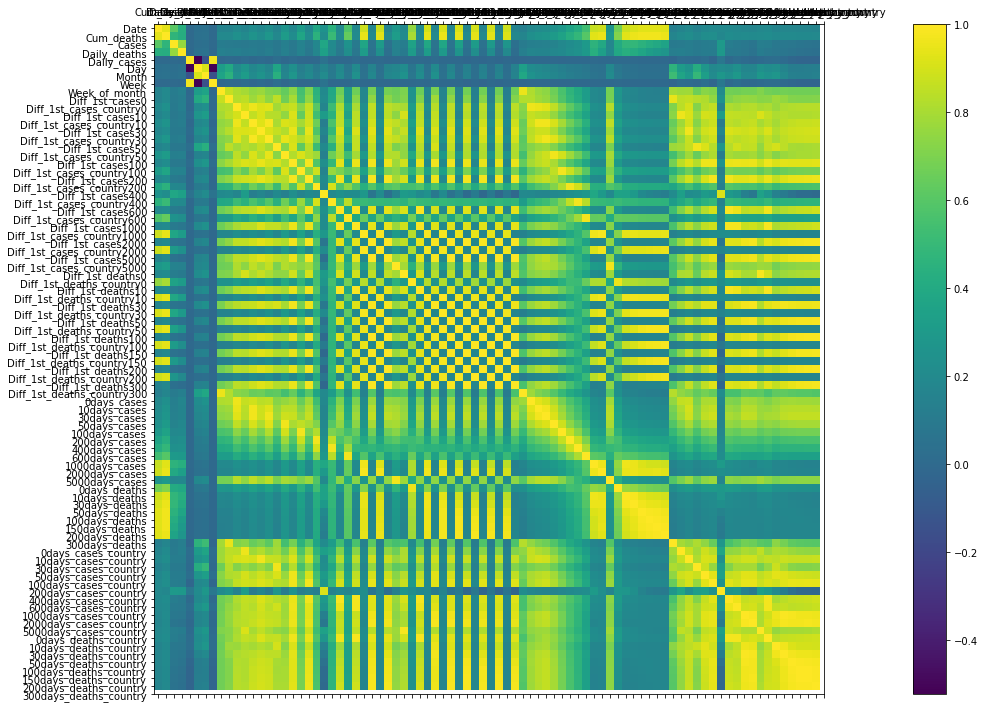

In [99]:
import matplotlib.pyplot as plt
plt.figure(figsize=(32,12))
plt.matshow(df.iloc[:,7::].corr(), fignum=1)
plt.xticks(range(len(df.iloc[:,7::].columns)), df.iloc[:,7::].columns)
plt.yticks(range(len(df.iloc[:,7::].columns)), df.iloc[:,7::].columns)
plt.colorbar()
plt.show()

In [100]:
df['Date'].min(), df['Date'].max()

(Timestamp('2020-01-22 00:00:00'), Timestamp('2020-03-23 00:00:00'))

In [101]:
deaths['Territory'].unique()

array(['Thailand', 'Japan', 'Singapore', 'Nepal', 'Malaysia', 'Canada',
       'Australia', 'Cambodia', 'Sri Lanka', 'Germany', 'Finland',
       'United Arab Emirates (the)', 'Philippines (the)', 'India',
       'Italy', 'Sweden', 'Spain', 'Belgium', 'Egypt', 'Lebanon', 'Iraq',
       'Oman', 'Afghanistan', 'Bahrain', 'Kuwait', 'Algeria', 'Croatia',
       'Switzerland', 'Austria', 'Israel', 'Pakistan', 'Brazil',
       'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania',
       'Estonia', 'San Marino', 'Belarus', 'Iceland', 'Lithuania',
       'Mexico', 'New Zealand', 'Nigeria', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Armenia',
       'Dominican Republic (the)', 'Indonesia', 'Portugal', 'Andorra',
       'Latvia', 'Morocco', 'Saudi Arabia', 'Senegal', 'Argentina',
       'Chile', 'Jordan', 'Ukraine', 'Hungary', 'Liechtenstein', 'Poland',
       'Tunisia', 'Bosnia and Herzegovina', 'Slovenia', 'South Africa',
       'Bhutan', 'Cameroon', 'C

## Some Quick Visualizations

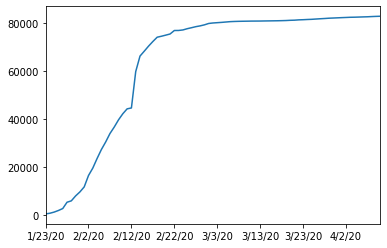

In [366]:
# Cases for mainland China (note - data is cumulative)
cases.groupby('Territory').sum().loc['China'][3:].plot()

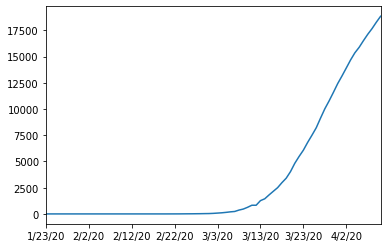

In [367]:
# Deaths in Italy
deaths.groupby('Territory').sum().loc['Italy'][3:].plot()

In [368]:
# Looking at raw numbers vs pop adjusted figures
grouped = deaths.groupby('Territory').sum()
# grouped['3/12/20'].sort_values(ascending=False).head(20) # Raw numbers
(grouped['3/12/20']*1e7/deaths.groupby('Territory').mean()['Population']).sort_values(ascending=False).head(20) # Scaled by population (deaths/10M people)

KeyError: 'Population'

## Preparing a 'sample submission' file and scoring locally

This will mimic the way submissions to Zindi will work. We'll generate an example submission file along with a reference file (the correct answers, used for scoring). 

Dates for the submission will change as the competition goes on. Here, we'll use the last available week of data for local testing. The next section shows how to create a submission file that can be uploaded to Zindi for scoring.

In [370]:
# Creating the 'reference' file

TEST_PERIOD = 7 # In days
deaths = deaths.drop('WDI_Code', axis = 1)
test_dates = deaths.columns[-TEST_PERIOD:] # The last two weeks worth of data
countries = deaths.groupby('Territory').sum()[test_dates] # Group by country/region, and select only the columns for the test_period

# Create a new dataframe, with a Region X Date column. 
reference = pd.DataFrame({
    'Territory X Date':list(map((lambda x: ' X '.join(x)), list(countries.stack().index.to_flat_index()))), # Check output to see what this is doing
    'target':countries.stack() # The target we'll be predicting: cumulative number of cases for a given region at a given date.
}).reset_index(drop=True) # Don't need the multiIndex created with Stack
reference.to_csv('reference.csv', index=False)
reference.head()

,Territory X Date,target
0,Afghanistan X 4/4/20,7
1,Afghanistan X 4/5/20,7
2,Afghanistan X 4/6/20,11
3,Afghanistan X 4/7/20,14
4,Afghanistan X 4/8/20,14


In [371]:
reference

,Territory X Date,target
0,Afghanistan X 4/4/20,7
1,Afghanistan X 4/5/20,7
2,Afghanistan X 4/6/20,11
3,Afghanistan X 4/7/20,14
4,Afghanistan X 4/8/20,14
...,...,...
1353,Zimbabwe X 4/6/20,1
1354,Zimbabwe X 4/7/20,2
1355,Zimbabwe X 4/8/20,3
1356,Zimbabwe X 4/9/20,3


In [372]:
# Sample submission is the same as the reference file, just with target set to 0
print(reference.target.sum())
ss = reference.copy()
ss['target'] = 0
print(ss.target.sum())
ss.to_csv('SampleSubLocal.csv', index=False)

576457
0


In [373]:
# Scoring
from sklearn.metrics import mean_absolute_error

# Create some 'predictions
predictions = ss.copy()
predictions['target'] = 42 # These would be your actual predictions

# Calculate MAE
print('MAE: ', mean_absolute_error(reference['target'], predictions['target']))

MAE:  437.0640648011782


# Matching the Zindi Submission File

The competition requires that you submit a file containing predictions for the whole of the time period between March 6 and June 7. The way it works is that only the relevant week's worth of predictions will be evaluated. Let's create an appropriate file.

In [374]:
dates = pd.date_range(start='2020-03-06', end='2020-06-07', freq='1d')
ids = []
for c in sorted(deaths['Territory'].unique()):
    for d in dates:
        ids.append(c + ' X ' + d.strftime('%m/%d/%y'))
ss = pd.DataFrame({
    'Territory X Date':ids,
    'target':0
})
ss.to_csv('SampleSubmission.csv', index=False)
ss.head()

,Territory X Date,target
0,Afghanistan X 03/06/20,0
1,Afghanistan X 03/07/20,0
2,Afghanistan X 03/08/20,0
3,Afghanistan X 03/09/20,0
4,Afghanistan X 03/10/20,0


In [375]:
ss.tail()

,Territory X Date,target
18231,Zimbabwe X 06/03/20,0
18232,Zimbabwe X 06/04/20,0
18233,Zimbabwe X 06/05/20,0
18234,Zimbabwe X 06/06/20,0
18235,Zimbabwe X 06/07/20,0


# Creating 'Train.csv'

You can shape your training data in any way you want, **provided that it does not include data from the test period**. The goal is to predict into the future. While the competition is open, you could simply use all the available data for training and get a near-perfect score. However, this won't represent how well your model will do in the future. The final score will be based on new, unseen data based on events after the competition closes. 

This is how the 'train.csv' file available from Zindi is generated:

In [387]:
dt = pd.read_csv('train.csv')
len(dt['Territory'].unique())

209

In [39]:
train_dates = deaths.columns[6:-TEST_PERIOD] # The dates for the train perion

# Grouping by territory
country_deaths = deaths.groupby('Territory').sum()[train_dates] 
country_cases = cases.groupby('Territory').sum()[train_dates] 

# Creating the dataframe
train = pd.DataFrame({
    'Territory X Date':list(map((lambda x: ' X '.join(x)), list(country_deaths.stack().index.to_flat_index()))), 
    'target':country_deaths.stack(),
    'cases':country_cases.stack() # Added as they may be useful
}).reset_index(drop=True)

# Add Separate Region and Date columns
train['Territory'] = train['Territory X Date'].apply(lambda x: x.split(' X ')[0])
train['Date'] = train['Territory X Date'].apply(lambda x: x.split(' X ')[1])

# Saving and viewing
train.to_csv('train.csv', index=False)
train.head()

,Territory X Date,target,cases,Territory,Date
0,Afghanistan X 1/22/20,0,0,Afghanistan,1/22/20
1,Afghanistan X 1/23/20,0,0,Afghanistan,1/23/20
2,Afghanistan X 1/24/20,0,0,Afghanistan,1/24/20
3,Afghanistan X 1/25/20,0,0,Afghanistan,1/25/20
4,Afghanistan X 1/26/20,0,0,Afghanistan,1/26/20


In [40]:
# Add Separate Region and Date columns
train['Territory'] = train['Territory X Date'].apply(lambda x: x.split(' X ')[0])
train['Date'] = train['Territory X Date'].apply(lambda x: x.split(' X ')[1])
train.head()

,Territory X Date,target,cases,Territory,Date
0,Afghanistan X 1/22/20,0,0,Afghanistan,1/22/20
1,Afghanistan X 1/23/20,0,0,Afghanistan,1/23/20
2,Afghanistan X 1/24/20,0,0,Afghanistan,1/24/20
3,Afghanistan X 1/25/20,0,0,Afghanistan,1/25/20
4,Afghanistan X 1/26/20,0,0,Afghanistan,1/26/20


In [41]:
train.to_csv('train.csv', index=False)

Zindi will update the training data weekly, but you are also encouraged to use the data from JH as shown in this notebook to keep up with the latest information.